#### Classification | MVP

# Predicting Heart Disease<a id='top'></a> 


## **Analysis Goal**  

## 1 | Research Question<a id='1'></a> 

* **RQ:** Could a model predict the probability of a patient having heart disease based on the risk factors in electronic health records?
* **Data source:** [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
* **Error metric:** Recall


## **Process**
Data source – (n=   , features = 17), quant qual, 

Classification metric – recall = providing a concrete label (either at risk or not at risk) 


[Dataset](#2)

[Logistic regression with mapped variable](#3B)  
[Logistic regression with dummy variables](#4B)  

## **Preliminary Visualization**
[Visualization](#4)

## **Preliminary Conclusions**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import make_column_transformer
from sklearn.ensemble import AdaBoostRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC ,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

from xgboost import XGBClassifier
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

[back to top](#top)

## 1 | Dataset: [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)<a id='1'></a>  

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
df.head()

In [ ]:
df.info()

[back to top](#top)

## 2 | Exploratory Data Analysis<a id='2'></a>  

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
# rename columns for readability
df.rename(columns = {'HeartDisease': 'y_heart_disease',
                     'Smoking': 'behavior_tobacco',
                     'AlcoholDrinking':'behavior_alcohol', 
                     'SleepTime': 'behavior_sleep',
                     'PhysicalActivity':'behavior_activity',
                     'AgeCategory':'demg_age', 
                     'Sex': 'demg_gender',
                     'Race': 'demg_race',
                     'Stroke': 'disease_stroke',
                     'Diabetic':'disease_diabetes',
                     'KidneyDisease': 'disease_kidney',
                     'Asthma': 'disease_asthma',
                     'SkinCancer': 'disease_skin',                     
                     'GenHealth': 'health_general',
                     'BMI': 'health_bmi',
                     'MentalHealth':'health_mental',
                     'PhysicalHealth': 'health_physical', 
                     'DiffWalking': 'health_mobility'}, inplace = True)

df = df.sort_index(axis=1)


In [ ]:
# list unique values by column to determine which ones need to be transformed
for col in df:
    print(col, df[col].unique())

In [ ]:
#save cleaned df as heart_disease_df

heart_disease_df = df 
heart_disease_df.to_pickle('heart_disease_df.pkl')
heart_disease_df.to_csv(r'/Users/sandraparedes/Documents/GitHub/metis_dsml/04_classification/g00-classification_project/heart_disease_df.csv', index=False)



In [2]:
heart_disease_df = pd.read_csv('heart_disease_df.csv')

[back to top](#top)

## 3 | Baseline Model: Mapped Variables  + Logistic Regression<a id='3'></a>  

In [3]:
df_map = heart_disease_df.copy()

### A. Map variables

In [4]:
# map Y/N to 1/0:
    # behavior_activity ['Yes' 'No']
    # behavior_alcohol ['No' 'Yes']
    # behavior_tobacco ['Yes' 'No']
    # disease_asthma ['Yes' 'No']
    # disease_diabetes ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] #adjust in next cell
    # disease_kidney ['No' 'Yes']
    # disease_skin ['Yes' 'No']
    # disease_stroke ['No' 'Yes']
    # health_mobility ['No' 'Yes']
    # y_heart_disease ['No' 'Yes']

df_map = df_map.replace({'Yes': 1, 'No': 0}) 

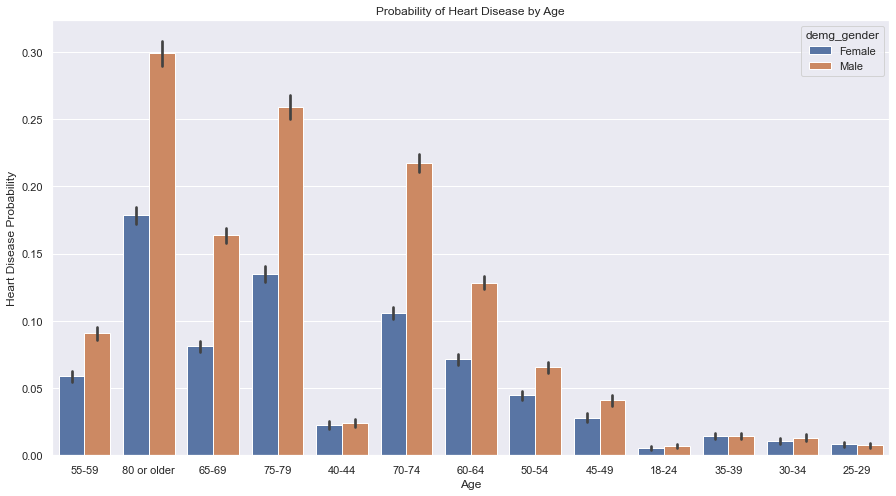

In [5]:
# plot heart disease probablity by age and gender

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = 'demg_age', y ='y_heart_disease', hue='demg_gender', data = df_map)
plt.ylabel('Heart Disease Probability')
plt.xlabel('Age')
plt.title('Probability of Heart Disease by Age')
plt.savefig("prob_hd_age.svg");


In [6]:
# map: 
    # disease_diabetes ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] #adjust in next cell
    # demo_gender ['Female' 'Male']
    # demo_race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other' 'Hispanic'] (alpha order)
    # health_general ['Very good' 'Fair' 'Good' 'Poor'=1 'Excellent'=5]

df_map = df_map.replace({'Yes (during pregnancy)': 2,           #Diabetes
                 'No, borderline diabetes': 3,  
                 'Female': 1,                                   #Sex 
                 'Male': 2,                             
                 'American Indian/Alaskan Native': 1,           #Race  
                 'Asian':2,                     
                 'Black':3,                      
                 'Hispanic':4,                   
                 'Other': 5,                     
                 'White': 6,                     
                 'Poor': 1,                                     #Health_General
                 'Fair': 2,                     
                 'Good': 3,                     
                 'Very good': 4,                
                 'Excellent': 5})               


In [7]:
# map age to lowest in bin: 
    # demo_age ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54' '45-49' 
                #'18-24' '35-39' '30-34' '25-29']

df_map = df_map.replace({'18-24':18,
             '25-29':25, 
             '30-34':30, 
             '35-39':35, 
             '40-44':40, 
             '45-49':45, 
             '50-54':50,
             '55-59':55,
             '60-64':60,
             '65-69':65,
             '70-74':70,
             '75-79':75,    
             '80 or older':80})


In [29]:
# list unique values by column to verify mapped properly

for col in df_map :
    print(col, df_map[col].unique())

behavior_activity [1 0]
behavior_alcohol [0 1]
behavior_sleep [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
behavior_tobacco [1 0]
demg_age [55 80 65 75 40 70 60 50 45 18 35 30 25]
demg_gender [1 2]
demg_race [6 3 2 1 5 4]
disease_asthma [1 0]
disease_diabetes [1 0 3 2]
disease_kidney [0 1]
disease_skin [1 0]
disease_stroke [0 1]
health_bmi [16.6  20.34 26.58 ... 62.42 51.46 46.56]
health_general [4 2 3 1 5]
health_mental [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
health_mobility [0 1]
health_physical [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
y_heart_disease [0 1]


In [25]:
# save and pickle df_map

heart_disease_df_map = df_map
heart_disease_df_map.to_pickle('heart_disease_df_map.pkl')
heart_disease_df_map.to_csv(r'/Users/sandraparedes/Documents/GitHub/metis_dsml/04_classification/g00-classification_project/heart_disease_df_map.csv', index=False)


### B. Logistic regression with mapped variables<a id='3B'></a>  

In [9]:
# separate target from select features using mapped variables
y_map = df_map['y_heart_disease'] 

X_map = df_map.loc[:, ['behavior_activity', 
                       'behavior_alcohol', 
                       'behavior_sleep',
                       'behavior_tobacco', 
                       'demg_age', 
                       'demg_gender', 
                       'demg_race',
                       'disease_asthma', 
                       'disease_diabetes', 
                       'disease_kidney', 
                       'disease_skin', 
                       'disease_stroke', 
                       'health_bmi', 
                       'health_general', 
                       'health_mental',
                       'health_mobility', 
                       'health_physical']]

In [10]:
# split map df into test/train/validate
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_map, 
                                                    y_map, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train_m, X_validate_m, y_train_m, y_validate_m = train_test_split(X_train_m, y_train_m, 
                                                            test_size = .25, random_state = 42)


In [11]:
# baseline rate of target using the mean of training data
print('Baseline probability of heart disease on y_train_map:',   (round(np.mean(y_train_m), 4)*100),'%')


Baseline probability of heart disease on y_train_map: 8.49 %


In [12]:
# scale map X train/test
scaler_map = StandardScaler()
X_train_scaled_m = scaler_map.fit_transform(X_train_m)
X_test_scaled_m = scaler_map.transform(X_test_m)

#logistic regression on map X train scaled & y train
logreg_map = LogisticRegression()
logreg_map.fit(X_train_scaled_m, y_train_m)

print('Logistic Regression (map train):', round(f1_score(logreg_map.predict(X_test_scaled_m), y_test_m), 4))

Logistic Regression (map train): 0.1671


[back to top](#top)

## 4 | Model Iteration #1: Dummy Variables + Logistic Regression<a id='4'></a>  

In [13]:
df_dmy = heart_disease_df.copy()

### A. Dummy variables

In [14]:
# dummy variables for non-numerical columns (commented out)
df_dmy = pd.get_dummies(data=df_dmy, 
                        columns=['behavior_activity', 
                                 'behavior_alcohol', 
#                                  'behavior_sleep',
                                 'behavior_tobacco', 
                                 'demg_age', 
                                 'demg_gender', 
                                 'demg_race',
                                 'disease_asthma', 
                                 'disease_diabetes', 
                                 'disease_kidney', 
                                 'disease_skin',
                                 'disease_stroke', 
#                                  'health_bmi', 
                                 'health_general', 
#                                  'health_mental',
                                 'health_mobility', 
#                                  'health_physical', 
                                 'y_heart_disease'],
                        drop_first=True)

# numerical features for reference: 
    # behavior_sleep [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
    # health_bmi [16.6  20.34 26.58 ... 62.42 51.46 46.56]
    # health_mental [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12. 6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
    # health_physical [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25. 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 


In [15]:
df_dmy.rename(columns = {'disease_diabetes_Yes (during pregnancy)': 'disease_diabetes_Yes_pregnancy',
                         'disease_diabetes_No, borderline diabetes': 'disease_diabetes_No_borderline'}, 
              inplace = True)


In [ ]:
df_dmy.columns

In [26]:
# save and pickle df_dmy

heart_disease_df_dmy = df_dmy
heart_disease_df_dmy.to_pickle('heart_disease_df_dmy.pkl')
heart_disease_df_dmy.to_csv(r'/Users/sandraparedes/Documents/GitHub/metis_dsml/04_classification/g00-classification_project/heart_disease_df_dmy.csv', index=False)


[back to top](#top)

### B. Logistic regression with dummy variables<a id='4B'></a>  

In [16]:
# separate target from select features using dummy variables
y_dmy = df_dmy['y_heart_disease_Yes']

X_dmy = df_dmy.loc[:, ['behavior_sleep', 
                       'health_bmi', 
                       'health_mental', 
                       'health_physical',
                       'behavior_activity_Yes', 
                       'behavior_alcohol_Yes', 
                       'behavior_tobacco_Yes',
                       'demg_age_25-29', 
                       'demg_age_30-34', 
                       'demg_age_35-39', 
                       'demg_age_40-44',
                       'demg_age_45-49', 
                       'demg_age_50-54', 
                       'demg_age_55-59', 
                       'demg_age_60-64',
                       'demg_age_65-69', 
                       'demg_age_70-74', 
                       'demg_age_75-79',
                       'demg_age_80 or older', 
                       'demg_gender_Male', 
                       'demg_race_Asian',
                       'demg_race_Black', 
                       'demg_race_Hispanic', 
                       'demg_race_Other',
                       'demg_race_White', 
                       'disease_asthma_Yes',
                       'disease_diabetes_No_borderline', 
                       'disease_diabetes_Yes',
                       'disease_diabetes_Yes_pregnancy', 
                       'disease_kidney_Yes',
                       'disease_skin_Yes', 
                       'disease_stroke_Yes', 
                       'health_general_Fair',
                       'health_general_Good', 
                       'health_general_Poor',
                       'health_general_Very good', 
                       'health_mobility_Yes']]


In [17]:
# split test dummy df into test/train/validate
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dmy, 
                                                    y_dmy, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train_d, X_validate_d, y_train_d, y_validate_d = train_test_split(X_train_d, y_train_d,
                                                                    test_size = .25, random_state = 4)

In [18]:
# baseline rate of target using the mean of training data
print('Baseline probability of heart disease on y_train_dummy:', (round(np.mean(y_train_d), 4)*100),'%')


Baseline probability of heart disease on y_train_dummy: 8.55 %


[back to top](#top)

In [19]:
# scale dummy X train/test
scaler_d = StandardScaler()
X_train_scaled_d = scaler_d.fit_transform(X_train_d)
X_test_scaled_d = scaler_d.transform(X_test_d)
X_validate_scaled_d = scaler_d.transform(X_validate_d)

# logistic regression on dummy X train scaled & y train
logreg_dmy = LogisticRegression()
logreg_dmy.fit(X_train_scaled_d, y_train_d)


LogisticRegression()

In [21]:
# score dummy_df on X_test_scaled and y_test
print('Logistic regression scores of dummy_df on X_test_scaled and y_test:')
print("accuracy:", accuracy_score(logreg_dmy.predict(X_test_scaled_d), y_test_d), 4)
print("precision:", precision_score(logreg_dmy.predict(X_test_scaled_d), y_test_d), 4)
print("recall:", recall_score(logreg_dmy.predict(X_test_scaled_d), y_test_d), 4)
print("f1:", f1_score(logreg_dmy.predict(X_test_scaled_d), y_test_d), 4)

Logistic regression scores of dummy_df on X_test_scaled and y_test:
accuracy: 0.9136478056254789 4
precision: 0.10318311874105865 4
recall: 0.5317972350230414 4
f1: 0.17283211022914483 4


In [23]:
# predict on X_validate_scaled_d 
y_pred_d = logreg_dmy.predict(X_validate_scaled_d) 

# score y_validate, y_predict with all metrics
print('Logistic regression scores of dummy_df on y_validate and y_pred:')
print("accuracy:", accuracy_score(y_validate_d, y_pred_d))
print("precision:", precision_score(y_validate_d, y_pred_d))
print("recall:", recall_score(y_validate_d, y_pred_d))
print("f1:", f1_score(y_validate_d, y_pred_d))


Logistic regression scores of dummy_df on y_validate and y_pred:
accuracy: 0.916696633781016
precision: 0.5226223453370268
recall: 0.10526315789473684
f1: 0.17523219814241486


[back to top](#top)

## 5. Preliminary Visualization<a id='5'></a> 


ROC AUC score =  0.8362882022783988


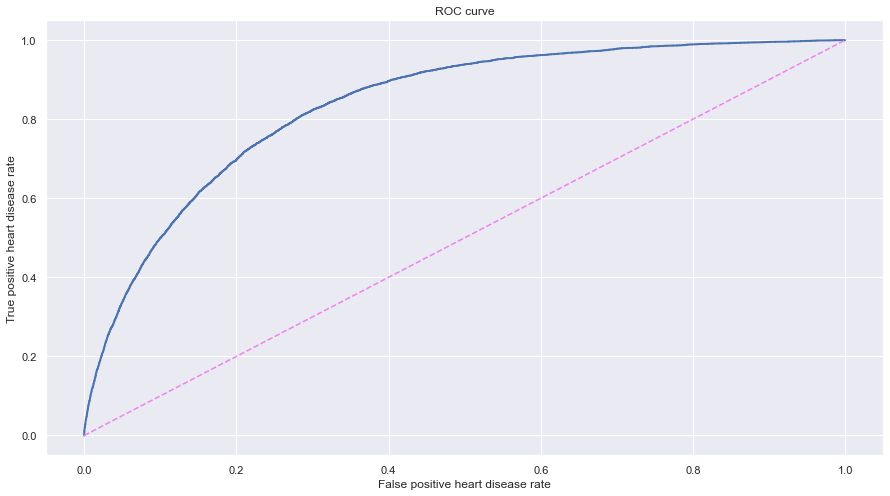

In [27]:
fpr, tpr, thresholds = roc_curve(y_validate_d, logreg_dmy.predict_proba(X_validate_scaled_d)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive heart disease rate')
plt.ylabel('True positive heart disease rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_validate_d, logreg_dmy.predict_proba(X_validate_scaled_d)[:,1]))
plt.savefig("roc_curve_dummy.svg");



[back to top](#top)